##  NVIDIA Company Current Stock Market Price Predictions

In [16]:
## import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
## import the dataset

In [18]:
dataset=pd.read_csv("NVIDIA Stock Price History.csv")
dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,7/7/2025,158.24,158.20,159.31,157.34,140.14M,-0.69%
1,7/3/2025,159.34,158.37,160.98,157.77,143.72M,1.33%
2,7/2/2025,157.25,152.98,157.60,152.97,171.22M,2.58%
3,7/1/2025,153.30,156.29,157.20,151.49,213.14M,-2.97%
4,6/30/2025,157.99,158.40,158.66,155.96,194.58M,0.15%


In [19]:
# check the dataset type

In [20]:
dataset.shape

(5004, 7)

In [21]:
## check the information of the dataset

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5004 entries, 0 to 5003
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5004 non-null   object 
 1   Price     5004 non-null   float64
 2   Open      5004 non-null   float64
 3   High      5004 non-null   float64
 4   Low       5004 non-null   float64
 5   Vol.      5004 non-null   object 
 6   Change %  5004 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.8+ KB


In [23]:
## check the null values of the dataset

In [24]:
dataset.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

## Data Preprocessing

In [41]:
## convert the object types columns to  numerical format

In [45]:
dataset['date(MM/DD/YYYY)'] = dataset['Date'].str.replace('/', '').astype(int)
dataset['date(MM/DD/YYYY)'].head()

0     772025
1     732025
2     722025
3     712025
4    6302025
Name: date(MM/DD/YYYY), dtype: int32

In [46]:
## chekck the information of the dataset again

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5004 entries, 0 to 5003
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      5004 non-null   object 
 1   Price                     5004 non-null   float64
 2   Open                      5004 non-null   float64
 3   High                      5004 non-null   float64
 4   Low                       5004 non-null   float64
 5   Vol.                      5004 non-null   object 
 6   Change %                  5004 non-null   object 
 7   date_numeric              5004 non-null   int32  
 8   date_numeric(MM/DD/YYYY)  5004 non-null   int32  
 9   date(MM/DD/YYYY)          5004 non-null   int32  
dtypes: float64(4), int32(3), object(3)
memory usage: 332.4+ KB


In [58]:
dataset['Change %'].head()

0   -0.69
1    1.33
2    2.58
3   -2.97
4    0.15
Name: Change %, dtype: float64

In [62]:
dataset['Change %'] = dataset['Change %'].astype(str).str.replace('%', '').astype(float)
dataset['Change %'].head()

0   -0.69
1    1.33
2    2.58
3   -2.97
4    0.15
Name: Change %, dtype: float64

In [63]:
dataset['Vol.'].head()

0    140.14M
1    143.72M
2    171.22M
3    213.14M
4    194.58M
Name: Vol., dtype: object

In [74]:
dataset['Vol.'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5004 entries, 0 to 5003
Series name: Vol.
Non-Null Count  Dtype 
--------------  ----- 
5004 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [76]:
dataset['Vol.'].value_counts()

Vol.
1.09B      14
1.11B      12
1.02B      12
1.14B      12
1.10B      12
           ..
703.51M     1
525.21M     1
747.64M     1
824.31M     1
510.48M     1
Name: count, Length: 4485, dtype: int64

In [86]:
def convert_volume(value):
    if isinstance(value, str):
        value = value.strip()
        if value.endswith('M'):
            return float(value[:-1]) * 1e6
        elif value.endswith('B'):
            return float(value[:-1]) * 1e9
        else:
            return pd.to_numeric(value, errors='coerce')  # for pure numbers
    return value

dataset['Vol'] = dataset['Vol.'].apply(convert_volume)


In [87]:
dataset['Vol'].head()

0    140140000.0
1    143720000.0
2    171220000.0
3    213140000.0
4    194580000.0
Name: Vol, dtype: float64

In [80]:
## Print the dataset

In [81]:
dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %,date_numeric,date_numeric(MM/DD/YYYY),date(MM/DD/YYYY),Vol
0,7/7/2025,158.24,158.20,159.31,157.34,140.14M,-0.69,772025,772025,772025,140140000.0
1,7/3/2025,159.34,158.37,160.98,157.77,143.72M,1.33,732025,732025,732025,143720000.0
2,7/2/2025,157.25,152.98,157.60,152.97,171.22M,2.58,722025,722025,722025,171220000.0
3,7/1/2025,153.30,156.29,157.20,151.49,213.14M,-2.97,712025,712025,712025,213140000.0
4,6/30/2025,157.99,158.40,158.66,155.96,194.58M,0.15,6302025,6302025,6302025,194580000.0


In [82]:
## drop the unnecessary columns  or duplicate columns

In [83]:
dataset_new=dataset.drop(['Date','date_numeric','date_numeric(MM/DD/YYYY)','Vol.'], axis=1)
dataset_new.head()

,Price,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
0,158.24,158.20,159.31,157.34,-0.69,772025,140140000.0
1,159.34,158.37,160.98,157.77,1.33,732025,143720000.0
2,157.25,152.98,157.60,152.97,2.58,722025,171220000.0
3,153.30,156.29,157.20,151.49,-2.97,712025,213140000.0
4,157.99,158.40,158.66,155.96,0.15,6302025,194580000.0


In [89]:
## Sperate the target column and  independent features

In [91]:
x=dataset_new.drop('Price',axis=1)
x.head()

,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
0,158.20,159.31,157.34,-0.69,772025,140140000.0
1,158.37,160.98,157.77,1.33,732025,143720000.0
2,152.98,157.60,152.97,2.58,722025,171220000.0
3,156.29,157.20,151.49,-2.97,712025,213140000.0
4,158.40,158.66,155.96,0.15,6302025,194580000.0


In [92]:
y=dataset_new['Price']
y.head()

0    158.24
1    159.34
2    157.25
3    153.30
4    157.99
Name: Price, dtype: float64

In [94]:
## scale the data using StandardScaler
from sklearn.preprocessing  import StandardScaler
std_scaler=StandardScaler()
std_scaled_data=std_scaler.fit_transform(x)
std_scaled_data

array([[ 4.64289089,  4.58865381,  4.7199883 , -0.03087937, -1.05525959,
        -0.93190952],
       [ 4.64835671,  4.64140729,  4.7341003 ,  0.00556343, -1.06540278,
        -0.92380929],
       [ 4.47505794,  4.53463678,  4.57657099,  0.02811468, -1.06793857,
        -0.86158686],
       ...,
       [-0.4422544 , -0.44251162, -0.44237827, -0.01843109, -0.92847631,
        -0.69607518],
       [-0.44193288, -0.44219573, -0.44237827, -0.37925097, -0.93101211,
        -0.47245905],
       [-0.4422544 , -0.44219573, -0.44237827,  0.43259376, -0.9335479 ,
        -0.09396562]])

In [95]:
## convert the scaled data into pandas dataframe
scaled_data_pd=pd.DataFrame(std_scaled_data, columns=x.keys())
scaled_data_pd.head()

,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
0,4.642891,4.588654,4.719988,-0.030879,-1.055260,-0.931910
1,4.648357,4.641407,4.734100,0.005563,-1.065403,-0.923809
2,4.475058,4.534637,4.576571,0.028115,-1.067939,-0.861587
3,4.581481,4.522001,4.527999,-0.072013,-1.070474,-0.766737
4,4.649321,4.568121,4.674699,-0.015725,0.347036,-0.808732


## Explotary Data Analysis (EDA)

In [101]:
## Check the correlation
dataset_corr=dataset_new.corr()
dataset_corr

,Price,Open,High,Low,Change %,date(MM/DD/YYYY),Vol
Price,1.000000,0.999567,0.999786,0.999832,0.008894,-0.009247,-0.176473
Open,0.999567,1.000000,0.999842,0.999773,0.008325,-0.008672,-0.176166
High,0.999786,0.999842,1.000000,0.999747,0.008306,-0.009540,-0.175391
Low,0.999832,0.999773,0.999747,1.000000,0.008927,-0.008520,-0.177346
Change %,0.008894,0.008325,0.008306,0.008927,1.000000,-0.009798,-0.011353
date(MM/DD/YYYY),-0.009247,-0.008672,-0.009540,-0.008520,-0.009798,1.000000,-0.038931
Vol,-0.176473,-0.176166,-0.175391,-0.177346,-0.011353,-0.038931,1.000000


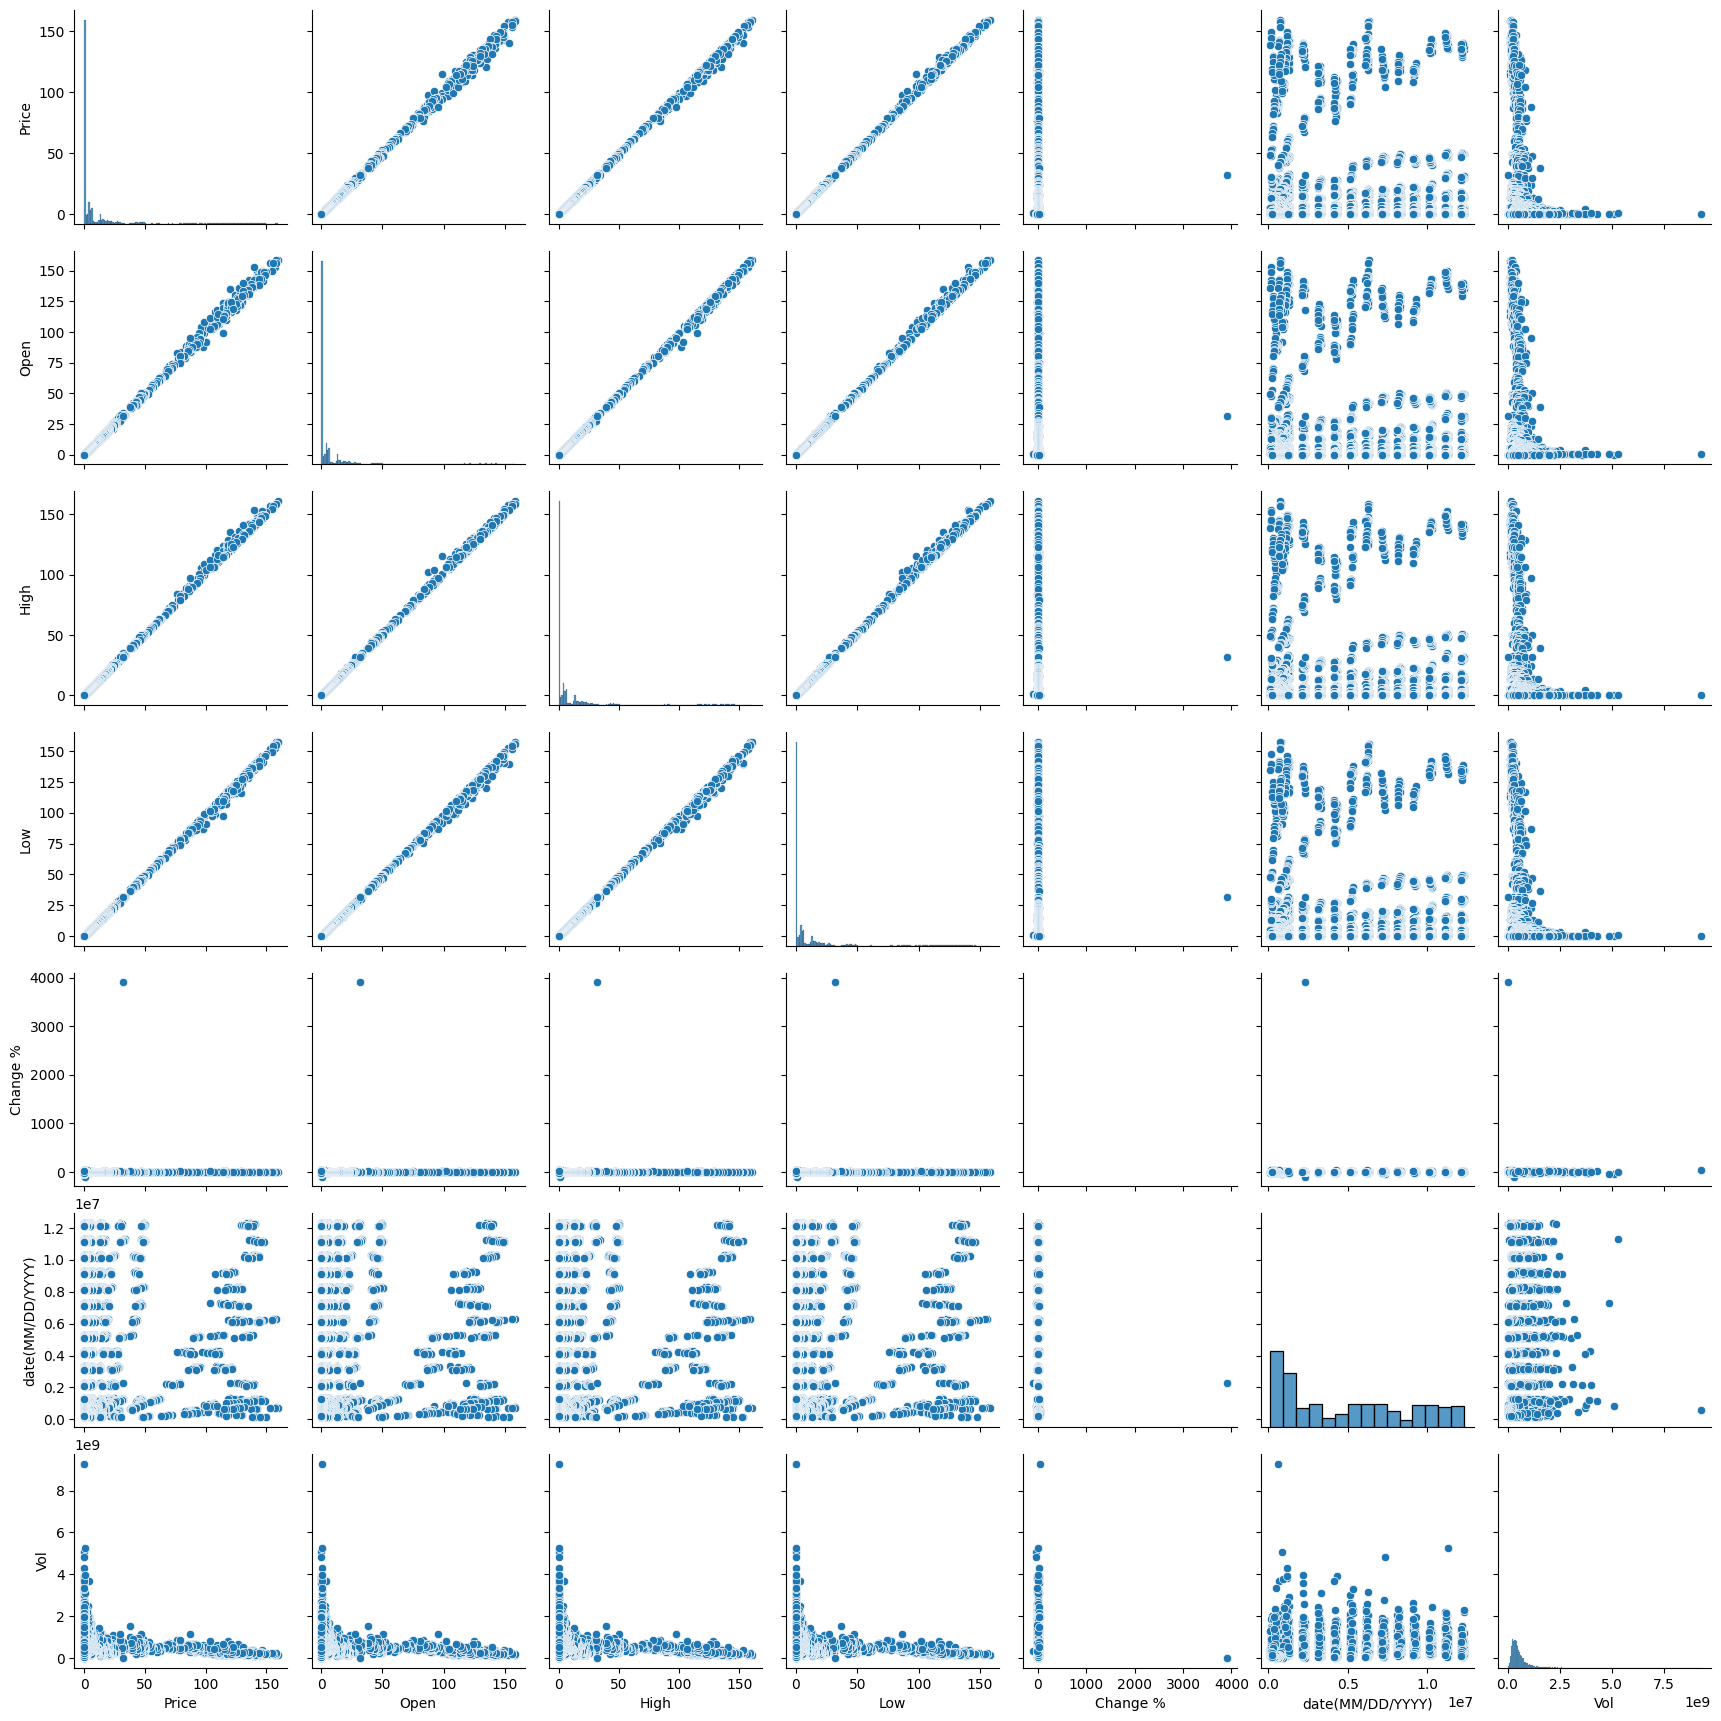

In [102]:
## plot the dataset
sns.pairplot(dataset_new)